<a href="https://colab.research.google.com/github/steven2Gamu/2021-Galaxio/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

#### Logistic regression:
      Output: probability [0, 1] given input belonging to a class

###### Load Data

In [48]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
import collections

In [59]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True,
                            transform=transforms.ToTensor(), download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())


0

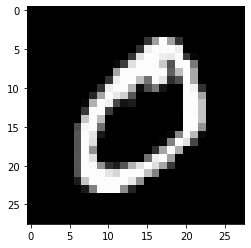

In [50]:
len(train_dataset)
type(train_dataset[0])

# Input Matrix
train_dataset[0][0].size()
train_dataset[0][0].numpy().shape
show_img = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')
train_dataset[1][1]

###### Make Dataset Iterable

      Aim: make the dataset iterable
      totaldata: 60000
      minibatch: 100
        :Number of examples in 1 iteration
      iterations: 3000
        :1 iteration: one mini-batch forward & backward pass
      epochs
        :1 epoch: running through the whole dataset once
        :epochs = iterations ÷ totaldata/minibatch = 3000 ÷ 60000/100 = 5
        

In [58]:
batch_size = 100
n_iters = 3000

num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# Iterable object
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

isinstance(train_loader, collections.Iterable)
isinstance(test_loader, collections.Iterable)

True

######  Building Model

In [52]:
class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    out = self.linear(x)
    return out

input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)


###### Instantiate Loss Class

In [57]:
# Create Cross Entry Loss Class
# Unlike linear regression, we do not use MSE here, we need Cross Entry Loss to calculate our loss before we backpropagate and update our parameters

criterion = nn.CrossEntropyLoss()  

# What happens in nn.CrossEntropyLoss()?

# It does 2 things at the same time.
        # 1. Computes softmax (logistic/softmax function)
        # 2. Computes cross entropy


<generator object Module.parameters at 0x7f41e6fe8ed0>
2
torch.Size([10, 784])
torch.Size([10])


###### Instantiate Optimiizer Class

In [ ]:
# parameters = parameters - learning_rate * parameters_gradients
# At every iteration, we update our model's parameters

learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Type of parameter object
print(model.parameters())

# Length of parameters
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

###### Train Model
        Process
          1. Convert inputs/labels to tensors with gradients
          2. Clear gradient buffets
          3. Get output given inputs
          4. Get loss
          5. Get gradients w.r.t. parameters
          6. Update parameters using gradients
               • parameters = parameters - learning_rate * parameters_gradients
          7. REPEAT

In [62]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.9011428356170654. Accuracy: 83.48999786376953
Iteration: 1000. Loss: 0.9259470105171204. Accuracy: 83.94999694824219
Iteration: 1500. Loss: 0.8562158346176147. Accuracy: 84.37999725341797
Iteration: 2000. Loss: 0.796617865562439. Accuracy: 84.8499984741211
Iteration: 2500. Loss: 0.7802692651748657. Accuracy: 85.16999816894531
Iteration: 3000. Loss: 0.8803310990333557. Accuracy: 85.47000122070312


###### Save Model

In [60]:
save_model = False
if save_model is True:
    # Saves only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')